In [1]:
html.eval('''<h1 style="text-align: center;">Aufgabe 1</h1>
          <h2 style="text-align: center;">
              Angewandte Mathematik
          </h2>
          <h4 style="text-align: center;">
              von Alexander M. Westphal, Klaus Riedl, Robert Taglauer
          </h4>''')

<h1 style="text-align: center;">Aufgabe 1</h1>
          <h2 style="text-align: center;">
              Angewandte Mathematik
          </h2>
          <h4 style="text-align: center;">
              von Alexander M. Westphal, Klaus Riedl, Robert Taglauer
          </h4>

In [2]:
html.eval('''<h1 style="text-align: left;">Aufgabe: 1a und 1b</h1>''')

<h1 style="text-align: left;">Aufgabe: 1a und 1b</h1>

Anzahl der Iterationen >> 5


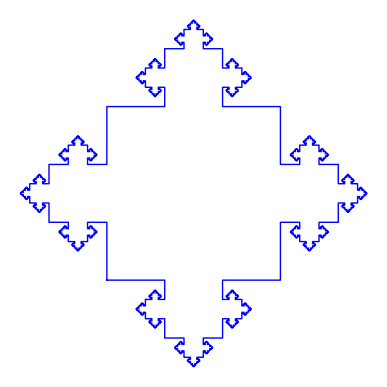

Umfang (in LE) 17.333


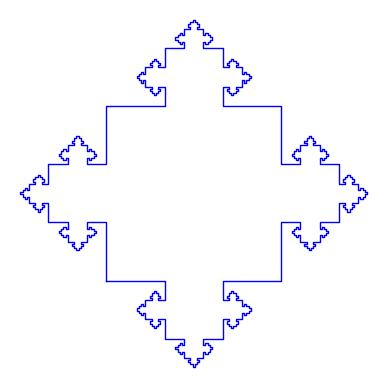

Umfang (in LE) 14.667


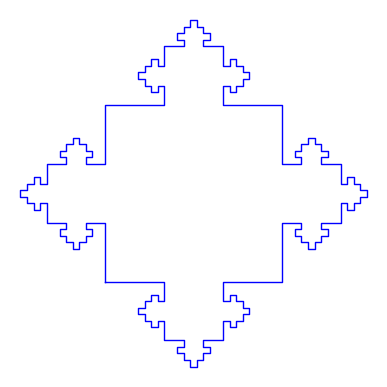

Umfang (in LE) 12.000


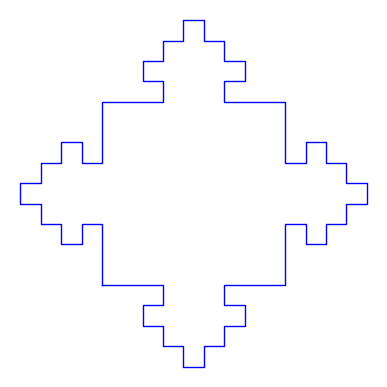

Umfang (in LE) 9.3333


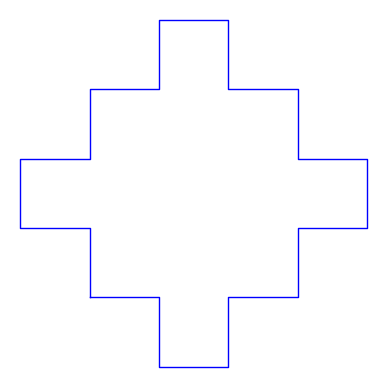

Umfang (in LE) 6.6667


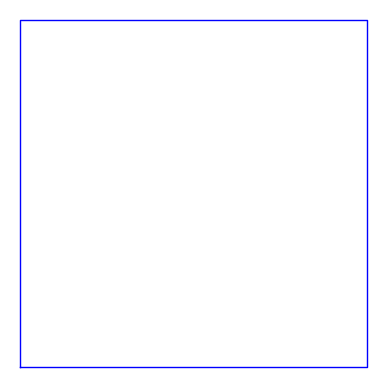

Umfang (in LE) 4.0000


In [10]:
def onethird (x,y):
    return(list(1/3*(vector(y)-vector(x))+vector(x)))

def twothird (x,y):
    return(list(2/3*(vector(y)-vector(x))+vector(x)))

def top (x,y):
    return[rotate(twothird(x,y),pi/2,onethird(x,y)),rotate(onethird(x,y),-pi/2,twothird(x,y))]

def rotate(pkt,alpha,Z):
    tmp = vector(pkt)-vector(Z)
    A = Matrix([
        [cos(alpha), -sin(alpha)],
        [sin(alpha), cos(alpha)]])
    return list((A*tmp)+vector(Z))

def grow(x,y):
    tmp = [x,onethird(x,y)] + top(x,y) + [twothird(x,y),y]
    return(tmp)

# Rekursives Wachsen
def quadratpflanze(x,y,iterations):
    g = grow(x,y)
    if (iterations == 0): return [x,y]
    elif (iterations == 1): return g
    else:
        q1 = quadratpflanze(g[0],g[1],0)
        q2 = quadratpflanze(g[1],g[2],iterations-1)
        q3 = quadratpflanze(g[2],g[3],iterations-1)
        q4 = quadratpflanze(g[3],g[4],iterations-1)
        q5 = quadratpflanze(g[4],g[5],0)
        return q1+q2+q3+q4+q5
    
A =[0,0]
B=[0,10]
C=[10,10]
D=[10,0]

iterations = 0

def umfang(iterations):
    print ("Umfang (in LE) " + str((4+(8/3*iterations)).n(digits=5)))

def calculate(iterations):
    if(iterations == -1):return
    G = Graphics()
    G = G + line(quadratpflanze(A,B,iterations)+ quadratpflanze(B,C,iterations) + quadratpflanze(C,D,iterations) + quadratpflanze(D,A,iterations))
    show(G,aspect_ratio=1,axes=False)
    umfang(iterations)
    calculate(iterations-1)

if __name__ == "__main__":
    global iterations
    iterations = int(input("Anzahl der Iterationen >> "))
    calculate(iterations)

In [4]:
html.eval('''<h1 style="text-align: left;">Aufgabe 1c</h1>''')

<h1 style="text-align: left;">Aufgabe 1c</h1>

Anzahl der Iterationen >> 5


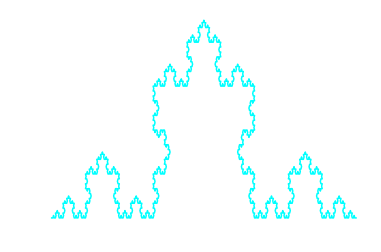

Umfang: 4.213991770


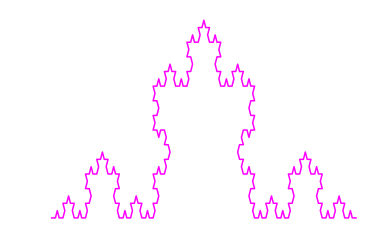

Umfang: 3.160493827


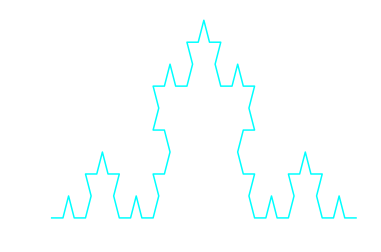

Umfang: 2.370370370


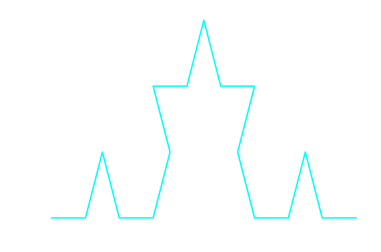

Umfang: 1.777777778


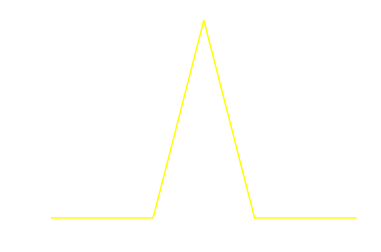

Umfang: 1.333333333


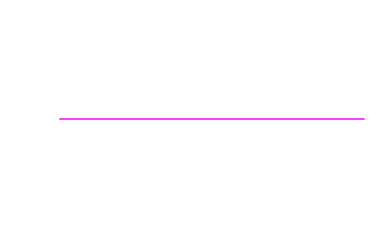

Umfang: 1.000000000


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor

colors = ['yellow', 'red', 'green', 'blue', 'magenta', 'cyan']
    
def snowflake(iterationsschritte):
        if iterationsschritte == -1: return
        k=iterationsschritte
        n_lines = 4**k
        h = 3**(-k);
        x = [0]*(n_lines+1)
        y = [0]*(n_lines+1)
        x[0], y[0] = 0, 0

        segment=[0] * n_lines;

        # The angles of the four segments. 
        angle=[0, np.pi/3, -np.pi/3, 0]   
        for i in range(n_lines):
            m=i
            ang=0
            for j in range(k):
                segment[j] = np.mod(m, 4)
                m = floor(m / 4)
                ang = ang + angle[int(segment[j])]

            x[i+1] = x[i] + h*np.cos(ang)
            y[i+1] = y[i] + h*np.sin(ang)
        plotter(x,y)
        umfang(iterationsschritte)
        snowflake(iterationsschritte - 1)
    
    
def randomColor():
    '''
    Method to return a random color
    '''
    return colors[randint(0, len(colors)-1)]

def umfang(n):
    print("Umfang (in LE): " + str(((4/3)^n).n(digits=5)))

def plotter(x,y):
    '''
    Plottermethod
    '''
    plt.plot(x, y, color=randomColor())
    plt.axis('off')
    plt.show()
    
if __name__ == "__main__":
    iterationsschritte = int(input("Anzahl der Iterationen >> "))
    snowflake(iterationsschritte)

